# 第7章 確率的トレンドとは何か？
## 7.4 ランダムウォークの判定

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as web
import numpy as np
end='2019/12/30'
lnn225 = np.log(web.DataReader("NIKKEI225", 'fred',"1949/5/16",end)).dropna()

C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[0])#検定統計量
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])#p-値
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[2])#ラグの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[3])#データの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[4])#臨界値

2.38799860708
0.997153864781
38
17044
{'5%': -1.9410157707887057, '1%': -2.565871190612659, '10%': -1.6168044261410237}


In [3]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='ct')[1])

0.753014670885


In [4]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[1])

0.125071866391


In [5]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[3])

17044


In [6]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[4])

{'5%': -2.8617095933204473, '1%': -3.4307337294729021, '10%': -2.5668602701718335}


In [7]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[:2])

(-2.461705722576955, 0.12507186639069184)


In [8]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])

0.997153864781


In [9]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='ct')[1])

0.50433866797


In [10]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='c')[1])

0.903086924527


In [11]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='nc')[1])

0.895822001571


In [12]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='ct')[1])

0.615588208256


In [13]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='c')[1])

0.480043863331


In [14]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='nc')[1])

0.999689754599


In [15]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='ct')[1])

0.84024093729


In [16]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='c')[1])

0.96175537736


In [17]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='nc')[1])

0.999996991887


In [18]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='ct')[1])

0.312378263485


In [19]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='c')[1])

0.768377939279


In [20]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='nc')[1])

0.999525130045


In [21]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='ct')[1])

0.40816834782


In [22]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='c')[1])

0.614194333311


In [23]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='nc')[1])

0.71409077222


In [24]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='ct')[1])

0.620086823201


In [25]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='c')[1])

0.652008364051


In [26]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='nc')[1])

0.999821116797


In [27]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='ct')[1])

0.906923219358


In [28]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='c')[1])

0.541394716595


In [29]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='nc')[1])

0.741465531024


In [30]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='nc')[1])

0.0739555163473


In [31]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='c')[1])

0.442806176355


In [32]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='ct')[1])

0.323414633113


In [33]:
z=lnn225
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("without drift  ",results.params[0])
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("with drift  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("with drift + time trend  ",results.params[0],results.params[1],results.params[2])

('without drift  ', 2.8599929646518734e-05)
('with drift  ', 0.0015017923444852305, -0.00014360915155268433)
('with drift + time trend  ', 0.0017008871728121165, -0.00017980155762129652, 1.2540320684538366e-08)


In [34]:
z=lnn225.loc[:"1954/11/30"]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225    0.000082
dtype: float64)
('c  ', 0.0010158563190787971, -0.00010764780610967526)
('ct  ', 0.015455834378998157, -0.0034833277649627698, 5.0073600478701232e-06)


In [35]:
z=lnn225.loc["1954/11/30":'1971/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225    0.000068
dtype: float64)
('c  ', 0.0035452211834228987, -0.00043445204571642912)
('ct  ', 0.0077638040262291994, -0.0011394052321696542, 3.4186272877483362e-07)


In [36]:
z=lnn225.loc['1971/12/31':'1986/11/30']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225    0.000057
dtype: float64)
('c  ', 0.00059449099700932279, -1.0333006186346883e-05)
('ct  ', 0.012677919948122666, -0.0015148449034599167, 6.0874320028795224e-07)


In [37]:
z=lnn225.loc['1986/11/30':'1993/10/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225    0.000003
dtype: float64)
('c  ', 0.022443821648993632, -0.0022164837215311642)
('ct  ', 0.043732130203513242, -0.0041589096334758175, -1.9440246375728736e-06)


In [38]:
z=lnn225.loc['1986/11/30':'1989/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
print("nc  ",results.aic)
print("nc  ",results.bic)
print("nc  ",results.rsquared)
print("nc  ",results.rsquared_adj)
print("nc  ",results.mse_resid)
print("nc  ",results.eigenvals)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
print("c  ",results.aic)
print("c  ",results.bic)
print("c  ",results.rsquared)
print("c  ",results.rsquared_adj)
print("c  ",results.mse_resid)
print("c  ",results.eigenvals)
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])
print("ct  ",results.aic)
print("ct  ",results.bic)
print("ct  ",results.rsquared)
print("ct  ",results.rsquared_adj)
print("ct  ",results.mse_resid)
print("ct  ",results.eigenvals)


('nc  ', NIKKEI225    0.000096
dtype: float64)
('nc  ', -4690.7192273754981)
('nc  ', -4686.0806595863314)
('nc  ', 0.0075452699572636783)
('nc  ', 0.0062445429191997359)
('nc  ', 0.00012604520290183935)
('nc  ', array([ 79769.67617582]))
('c  ', 0.02735779633148306, -0.0025811995541898049)
('c  ', -4690.1949216494431)
('c  ', -4680.9177860711097)
('c  ', 0.001793776010617365)
('c  ', 0.00048379408937149204)
('c  ', 0.0001259670713612881)
('c  ', array([  8.05334306e+04,   2.45603153e-01]))
('ct  ', 0.22786812894271039, -0.022869218461065613, 1.7724839579407202e-05)
('ct  ', -4696.3498222539338)
('ct  ', -4682.4341188864346)
('ct  ', 0.012391920325418027)
('ct  ', 0.0097963668965755923)
('ct  ', 0.00012479342603525408)
('ct  ', array([  1.48417739e+08,   1.89889943e+04,   2.27656103e-02]))


In [39]:
z=lnn225.loc['1993/10/31':]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225    0.000002
dtype: float64)
('c  ', 0.011126194545273199, -0.0011617540734591939)
('ct  ', 0.00949595220098573, -0.0010239961389929379, 1.0595365268812821e-07)


In [40]:
z=lnn225.loc['1990/1/1':'1992/8/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

('nc  ', NIKKEI225   -0.000118
dtype: float64)
('c  ', 0.055970670965774613, -0.0056602757810297498)
('ct  ', 0.2070159796124646, -0.020029652526247502, -1.8352425875113999e-05)


## 7.5 確定的トレンドと確率的トレンド

Text(0,0.5,u'log(n225 index)')

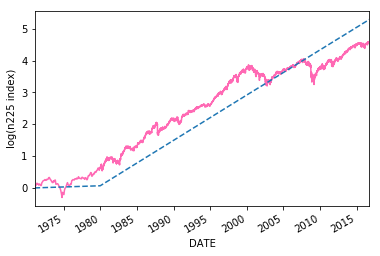

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
lnw5000 = np.log(web.DataReader("WILL5000INDFC", 'fred',"1949/5/16",end)).dropna()
lnw5000.columns=['Close']
plt.plot(lnw5000.Close,color='hotpink')
lnw5000["t"]=range(len(lnw5000))
model=sm.OLS(lnw5000.Close,lnw5000.t)
results=model.fit()
results.fittedvalues.plot(label='prediction',style='--')
plt.ylabel('log(n225 index)')

Text(0.5,0,u'residual')

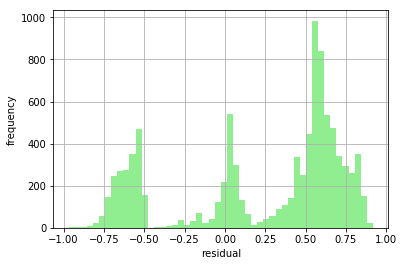

In [42]:
results.resid.hist(bins=50,color='lightgreen')
plt.ylabel('frequency')
plt.xlabel('residual')

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.770e+05
Date:                Mon, 15 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:02:09   Log-Likelihood:                -7929.6
No. Observations:                9397   AIC:                         1.586e+04
Df Residuals:                    9396   BIC:                         1.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t              0.0006   1.07e-06    526.352      0.0